In [40]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

import itertools

from sklearn.metrics import confusion_matrix

import seaborn as sn

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

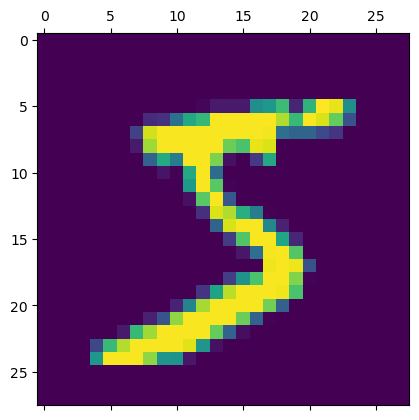

In [3]:
plt.matshow(X_train[0])

In [4]:
y_train[0]

5

In [5]:
X_train = X_train/255
X_test = X_test/255

In [8]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [6]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_train_flattened.shape

(60000, 784)

In [10]:
X_test_flattened = X_test.reshape(len(X_test), 28*28)
X_test_flattened.shape

(10000, 784)

In [9]:
X_test_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [12]:
# Not inculding any Hidden layers
model1 = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784,), activation='sigmoid')
])

model1.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model1.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.8126 - loss: 0.7167
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9137 - loss: 0.3061
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9223 - loss: 0.2808
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9240 - loss: 0.2700
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9257 - loss: 0.2673


In [13]:
model1.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9159 - loss: 0.3063


[0.26849132776260376, 0.9254000186920166]

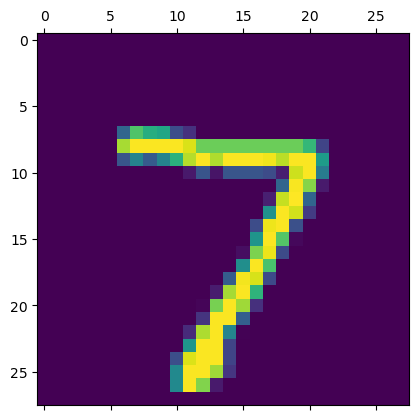

In [14]:
plt.matshow(X_test[0])

In [15]:
y_predicted = model1.predict(X_test_flattened)
y_predicted[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([1.8702902e-02, 1.7507890e-07, 7.7602744e-02, 9.5884883e-01,
       2.7630539e-03, 8.0232561e-02, 1.6190957e-06, 9.9983221e-01,
       7.9995371e-02, 6.5622759e-01], dtype=float32)

In [16]:
np.argmax(y_predicted[0])

7

In [17]:
# We see that the predcited value matches the actual label

In [19]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [20]:
#Understanding the confusion matrix for the first model
#confusion_matrix1 = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
#confusion_matrix1

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    2,    2,    0,    4,    5,    2,    1,    0],
       [   0, 1106,    5,    2,    0,    1,    4,    2,   15,    0],
       [   6,    6,  945,   14,    8,    1,   12,    9,   26,    5],
       [   4,    0,   21,  931,    1,   17,    2,   10,   14,   10],
       [   2,    1,    7,    1,  913,    0,    9,    4,    9,   36],
       [  13,    1,    8,   45,   11,  750,   14,    9,   34,    7],
       [  13,    3,    7,    1,    7,    7,  915,    2,    3,    0],
       [   1,    5,   24,    7,    8,    0,    0,  947,    2,   34],
       [  10,    5,    9,   28,    9,   18,   11,   11,  862,   11],
       [  10,    6,    2,   12,   24,    5,    0,   24,    5,  921]])>

In [41]:
conf_matrix = confusion_matrix(y_test, y_predicted_labels)
conf_matrix.shape

(10, 10)

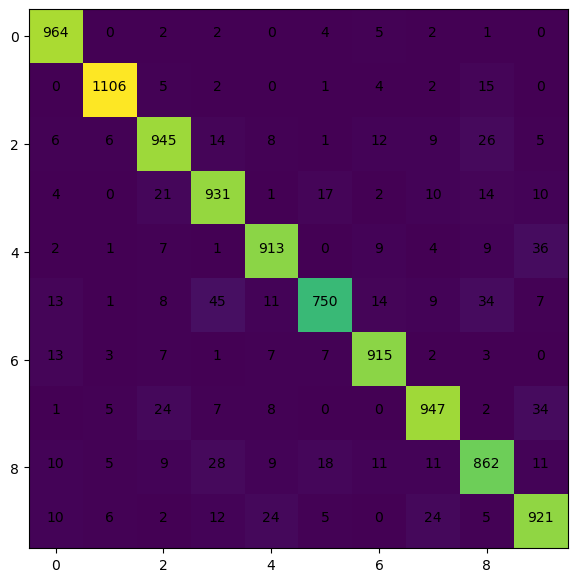

In [43]:
plt.figure(figsize=(7,7))
plt.imshow(conf_matrix)
for i, j in itertools.product(range(10), range(10)):
    plt.text(j, i, conf_matrix[i,j], horizontalalignment='center')
plt.show()

In [48]:
model1.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9159 - loss: 0.3063


[0.26849132776260376, 0.9254000186920166]

In [45]:
# Inculding Hidden layers
model2 = keras.Sequential([
    keras.layers.Dense(100, input_shape = (784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model2.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model2.fit(X_train_flattened, y_train, epochs = 5)

C:\Users\srini\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:73: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8770 - loss: 0.4468
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9624 - loss: 0.1305
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9745 - loss: 0.0856
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9802 - loss: 0.0646
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9859 - loss: 0.0476


In [47]:
model2.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9741 - loss: 0.0889


[0.07711151242256165, 0.9771999716758728]